In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
data = pd.read_csv('downloads/train.csv')

In [10]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


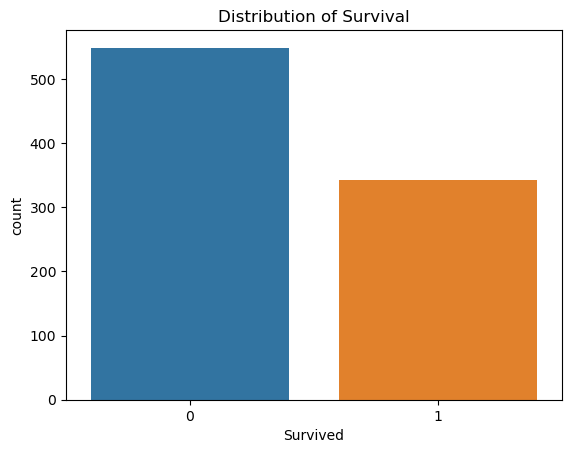

In [16]:
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survival')
plt.show()

In [24]:
data['Survived'] = data['Survived'].astype('category')

In [25]:
print(data['Survived'].unique())

[0, 1]
Categories (2, int64): [0, 1]


In [27]:
data['Survived'] = data['Survived'].astype(str)

In [28]:
print(data['Survived'].isna().sum())

0


In [29]:
data['Survived'].fillna('Unknown', inplace=True)

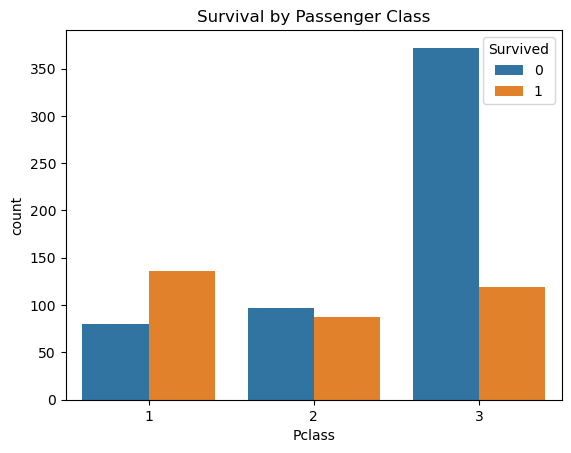

In [36]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

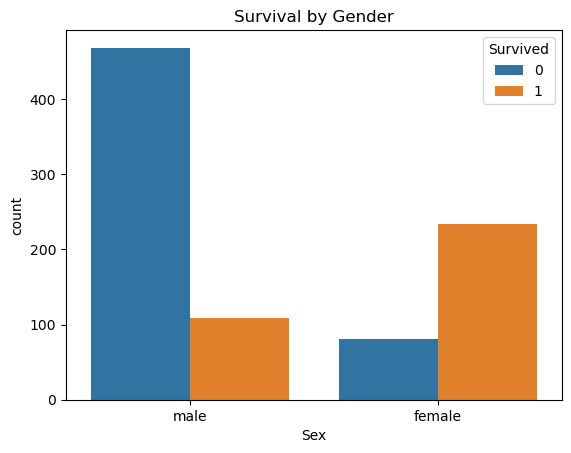

In [38]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()

In [42]:
print(data.isin([np.inf, -np.inf]).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [43]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [44]:
data.fillna(0, inplace=True) 

In [45]:
data.dropna(inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


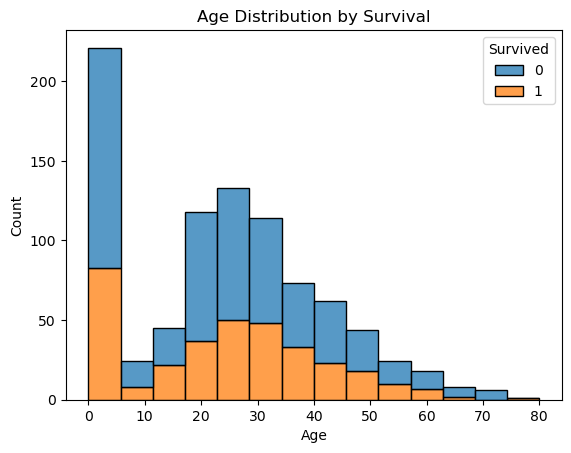

In [49]:
sns.histplot(data=data, x='Age', hue='Survived',multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

In [50]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [52]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [53]:
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [54]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [55]:
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [56]:
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'boat', 'body', 'home.dest']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data.drop(columns=columns_to_drop, inplace=True)

In [59]:
X = data.drop(columns=['Survived'])
Y = data['Survived']
print(data.head())

   PassengerId Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1        0       3    0  22.0      1      0   7.2500       2.0
1            2        1       1    1  38.0      1      0  71.2833       0.0
2            3        1       3    1  26.0      0      0   7.9250       2.0
3            4        1       1    1  35.0      1      0  53.1000       2.0
4            5        0       3    0  35.0      0      0   8.0500       2.0


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [63]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [65]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [66]:
Y_pred = model.predict(X_test)

In [67]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [68]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[90 10]
 [29 50]]


In [69]:
class_report = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       100
           1       0.83      0.63      0.72        79

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

